In [133]:
import requests # this allows pandas to make requests to a secure server using http
import pandas as pd # pandas library

In [134]:
url = "https://www.themealdb.com/api/json/v1/1/categories.php"
response = requests.get(url) #this sents a GET request to this ^ url

data = response.json() # this converts the data into json style formatting.

In [135]:
for category in data["categories"]: # prints out every category 
    print(category["strCategory"])

Beef
Chicken
Dessert
Lamb
Miscellaneous
Pasta
Pork
Seafood
Side
Starter
Vegan
Vegetarian
Breakfast
Goat


In [136]:
import requests

categories = ["Beef", "Chicken", "Dessert", "Vegetarian", "Seafood"]

for category in categories:
    print(f"\n--- Meals in category: {category} ---")
    
    url = f"https://www.themealdb.com/api/json/v1/1/filter.php?c={category}"
    response = requests.get(url)
    data = response.json()
    
    for meal in data["meals"]:
        print(meal)



--- Meals in category: Beef ---
{'strMeal': 'Beef and Mustard Pie', 'strMealThumb': 'https://www.themealdb.com/images/media/meals/sytuqu1511553755.jpg', 'idMeal': '52874'}
{'strMeal': 'Beef and Oyster pie', 'strMealThumb': 'https://www.themealdb.com/images/media/meals/wrssvt1511556563.jpg', 'idMeal': '52878'}
{'strMeal': 'Beef Asado', 'strMealThumb': 'https://www.themealdb.com/images/media/meals/pkopc31683207947.jpg', 'idMeal': '53071'}
{'strMeal': 'Beef Banh Mi Bowls with Sriracha Mayo, Carrot & Pickled Cucumber', 'strMealThumb': 'https://www.themealdb.com/images/media/meals/z0ageb1583189517.jpg', 'idMeal': '52997'}
{'strMeal': 'Beef Bourguignon', 'strMealThumb': 'https://www.themealdb.com/images/media/meals/vtqxtu1511784197.jpg', 'idMeal': '52904'}
{'strMeal': 'Beef Brisket Pot Roast', 'strMealThumb': 'https://www.themealdb.com/images/media/meals/ursuup1487348423.jpg', 'idMeal': '52812'}
{'strMeal': 'Beef Caldereta', 'strMealThumb': 'https://www.themealdb.com/images/media/meals/41cx

In [137]:
all_meals = []  # List to store meal details with ingredients

for category in categories:
    print(f"\nProcessing category: {category}")
    
    url = f"https://www.themealdb.com/api/json/v1/1/filter.php?c={category}"
    response = requests.get(url)
    data = response.json()
    
    for meal in data["meals"]:
        meal_id = meal["idMeal"]
        
        # Get full meal details
        lookup_url = f"https://www.themealdb.com/api/json/v1/1/lookup.php?i={meal_id}"
        lookup_response = requests.get(lookup_url)
        meal_details = lookup_response.json()["meals"][0]
        
        # Extract ingredients (up to 20)
        ingredients = []
        for i in range(1, 21):
            ingredient = meal_details.get(f"strIngredient{i}")
            if ingredient and ingredient.strip():
                ingredients.append(ingredient.strip())
        
        # stores meal info in a dictionary and add to list
        all_meals.append({
            "category": category,
            "meal": meal_details["strMeal"],
            "ingredients": ingredients
        })

print(f"\nTotal meals collected: {len(all_meals)}")

# Prints first 3 meals as a check
for meal in all_meals[:3]:
    print(meal)


Processing category: Beef

Processing category: Chicken

Processing category: Dessert

Processing category: Vegetarian

Processing category: Seafood

Total meals collected: 216
{'category': 'Beef', 'meal': 'Beef and Mustard Pie', 'ingredients': ['Beef', 'Plain Flour', 'Rapeseed Oil', 'Red Wine', 'Beef Stock', 'Onion', 'Carrots', 'Thyme', 'Mustard', 'Egg Yolks', 'Puff Pastry', 'Green Beans', 'Butter', 'Salt', 'Pepper']}
{'category': 'Beef', 'meal': 'Beef and Oyster pie', 'ingredients': ['Beef', 'Olive Oil', 'Shallots', 'Garlic', 'Bacon', 'Thyme', 'Bay Leaf', 'Stout', 'Beef Stock', 'Corn Flour', 'Oysters', 'Plain Flour', 'Salt', 'Butter', 'Eggs']}
{'category': 'Beef', 'meal': 'Beef Asado', 'ingredients': ['Beef', 'Beef Stock Concentrate', 'Tomato Puree', 'Water', 'Soy Sauce', 'White Wine Vinegar', 'Pepper', 'Bay Leaf', 'Lemon', 'Tomato Sauce', 'Butter', 'Olive Oil', 'Onion', 'Garlic']}


In [138]:
# Create a long-format table: one row per ingredient
expanded_rows = []

for meal in all_meals:
    for ingredient in meal["ingredients"]:
        expanded_rows.append({
            "category": meal["category"],
            "meal": meal["meal"],
            "ingredient": ingredient
        })

df = pd.DataFrame(expanded_rows)
df.head()

,category,meal,ingredient
0,Beef,Beef and Mustard Pie,Beef
1,Beef,Beef and Mustard Pie,Plain Flour
2,Beef,Beef and Mustard Pie,Rapeseed Oil
3,Beef,Beef and Mustard Pie,Red Wine
4,Beef,Beef and Mustard Pie,Beef Stock


In [139]:


df.to_csv("ingredient_diversity_project.csv", index=False)

In [140]:
## Data Visualization using Matplotlib

In [141]:
import matplotlib.pyplot as plt

%matplotlib inline 
#So that you can see the visualizations inside of the notebook

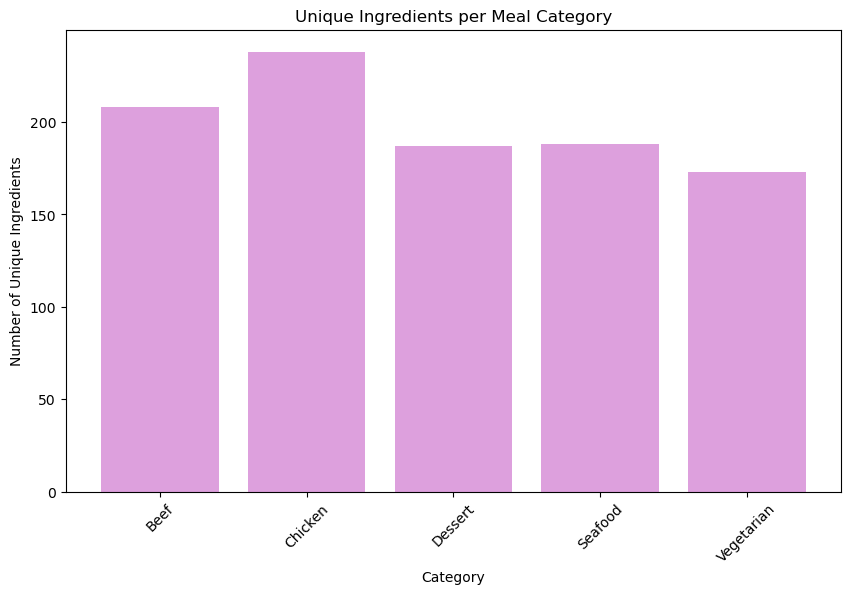

In [155]:
unique_ingredient_count = df.groupby('category')['ingredient'].nunique()

plt.figure(figsize=(10,6))
plt.bar(unique_ingredient_count.index, unique_ingredient_count.values, color='plum')
plt.xlabel('Category')
plt.ylabel('Number of Unique Ingredients')
plt.title('Unique Ingredients per Meal Category')
plt.xticks(rotation=45)


plt.savefig("ingredientsas.png", dpi=300, bbox_inches='tight')
plt.show()

ingredient
Butter       81
Salt         65
Olive Oil    62
Garlic       60
Onion        54
Eggs         50
Water        42
Pepper       38
Sugar        37
Milk         34
dtype: int64


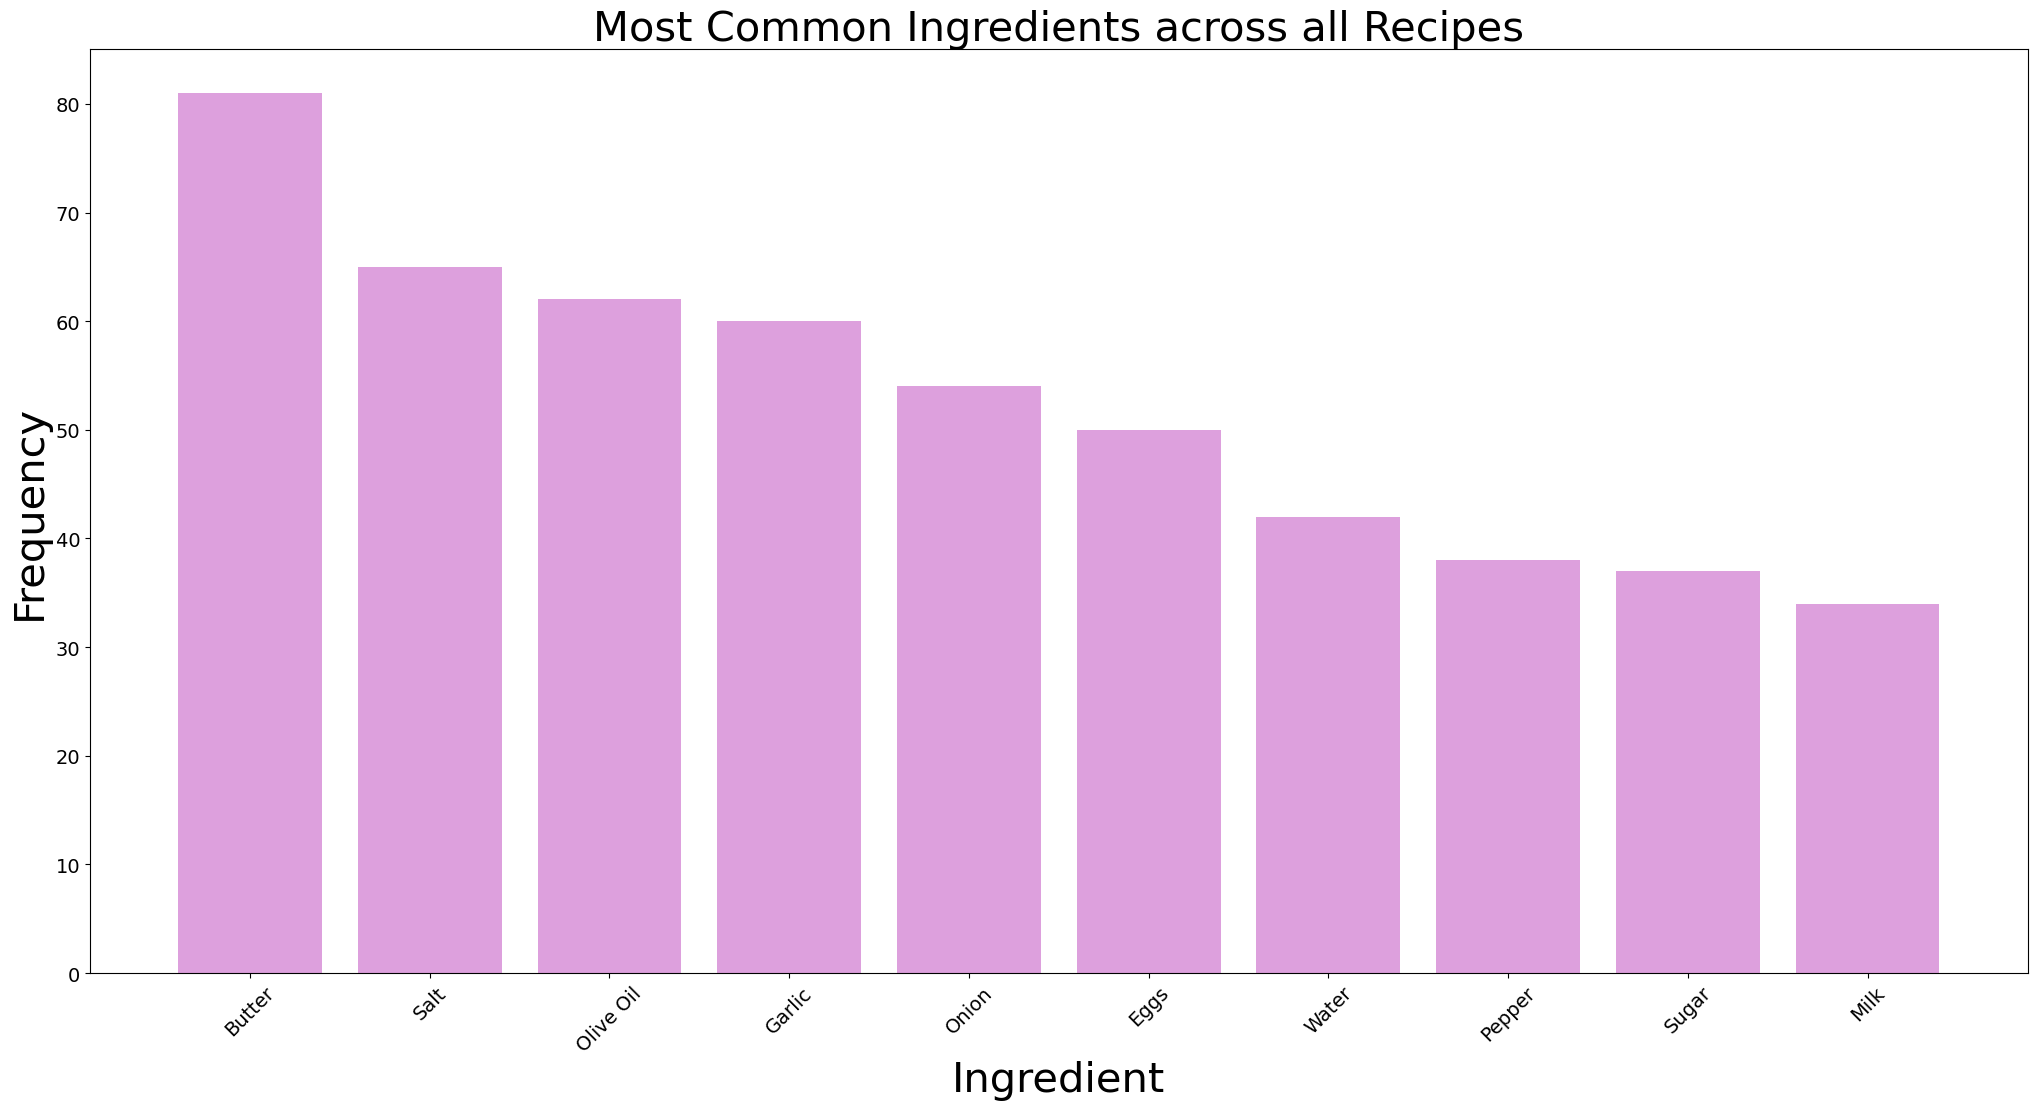

In [154]:
frequently_used = df.groupby('ingredient').size()
top_10 = frequently_used.sort_values(ascending=False).head(10)
print(top_10)

plt.figure(figsize=(25,12))
plt.bar(top_10.index, top_10.values, color='plum')
plt.xlabel('Ingredient', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.title('Most Common Ingredients across all Recipes', fontsize=30)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)


plt.savefig("unique_ingredientaa.png", dpi=300, bbox_inches='tight')
plt.show()


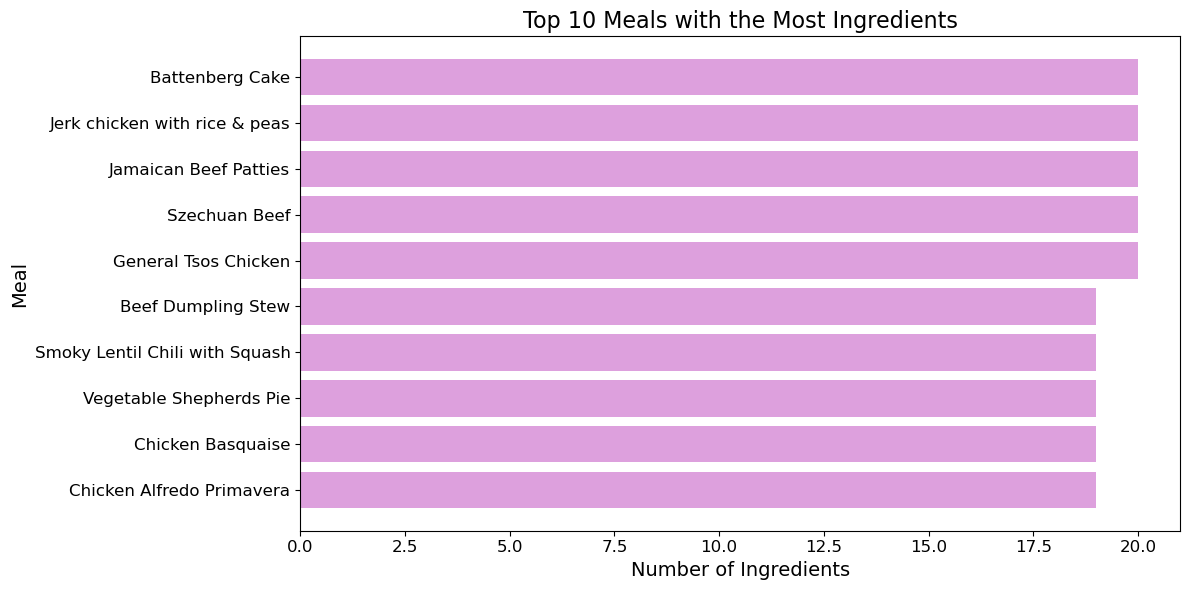

In [153]:
highest_number = df.groupby('meal')['ingredient'].size()
top_10_meals = highest_number.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_meals.index, top_10_meals.values, color='plum')

# Labels and styling
plt.xlabel("Number of Ingredients", fontsize=14)
plt.ylabel("Meal", fontsize=14)
plt.title("Top 10 Meals with the Most Ingredients", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gca().invert_yaxis()  # Puts the meal with most ingredients on top
plt.tight_layout()


plt.savefig("top_10sa.png", dpi=300, bbox_inches='tight')
plt.show()

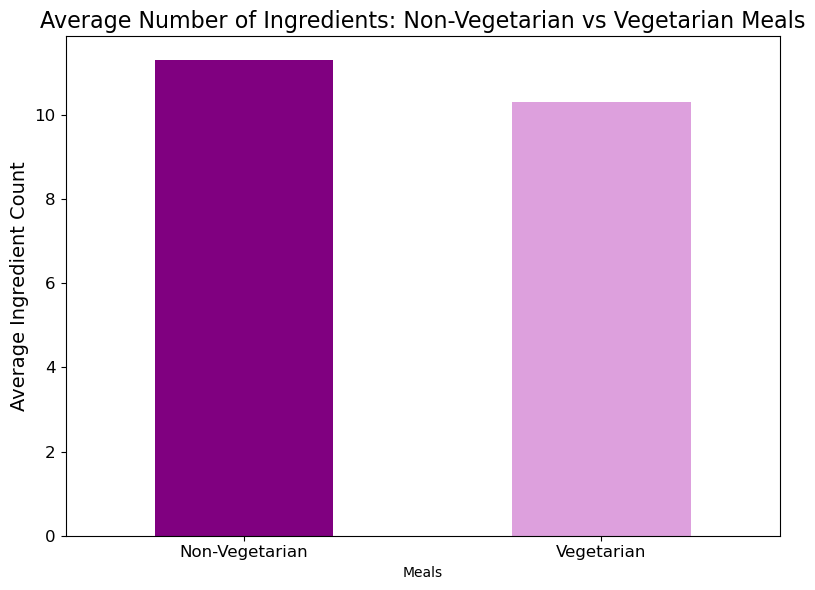

In [151]:
# Sort meals into Vegetarian and Non-Vegetarian
def vegan_label(category):
    if category == 'Vegetarian':
        return 'Vegetarian'
    else:
        return 'Non-Vegetarian'

# Create the new column
df['vegan_label'] = df['category'].apply(vegan_label)

# Count ingredients from each meal
ingredient_counts = df.groupby(['meal', 'vegan_label'])['ingredient'].count().reset_index(name='ingredient_count')

# Calculate average
avg_ingredients = ingredient_counts.groupby('vegan_label')['ingredient_count'].mean()

# Plot
plt.figure(figsize=(8,6))
avg_ingredients.plot(kind='bar', color=['purple', 'plum'])

plt.title('Average Number of Ingredients: Non-Vegetarian vs Vegetarian Meals', fontsize=16)
plt.xlabel('Meals')
plt.ylabel('Average Ingredient Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("veganvsnons.png", dpi=300, bbox_inches='tight')
plt.show()



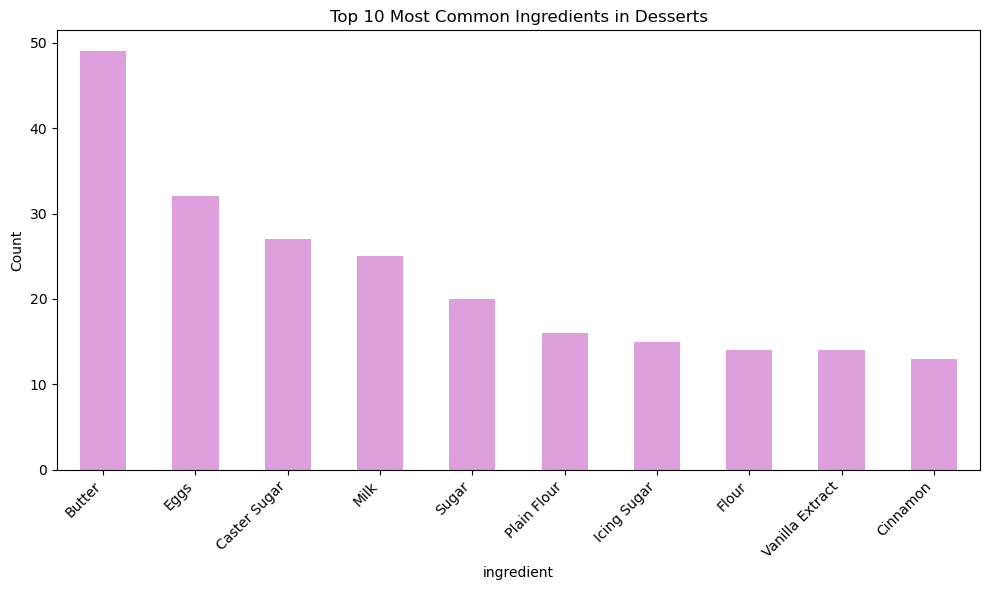

In [152]:


# distinguishing between desserts and other
def label_dessert(category):
    if category == 'Dessert':
        return 'Dessert'
    else:
        return 'Other'


df['is_dessert'] = df['category'].apply(label_dessert)

# filter to desserts only
dessert_df = df[df['is_dessert'] == 'Dessert']

# count occurences in desserts
ingredient_counts = dessert_df['ingredient'].value_counts()

# top 10
top_ingredients = ingredient_counts.head(10)

# plot bar chart
plt.figure(figsize=(10,6))
top_ingredients.plot(kind='bar', color='plum')
plt.title('Top 10 Most Common Ingredients in Desserts')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.savefig("dessert_ingredientaa.png", dpi=300, bbox_inches='tight')
plt.show()
